In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [31]:
# Load CSV files into DataFrames
patients = pd.read_csv('patients.csv')
admissions = pd.read_csv('admissions.csv')
diagnoses_icd = pd.read_csv('diagnoses_icd.csv')

# Patients

In [3]:
# Patients: subject_id (primary key), anchor_age (age at anchor_year), anchor_year_group (range around real anchor_year)
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [4]:
# Calculate birth year (de-identified) to help with calculating age at admission
patients["birth_year"] = patients["anchor_year"] - patients["anchor_age"]
patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,birth_year
0,10000032,F,52,2180,2014 - 2016,2180-09-09,2128
1,10000048,F,23,2126,2008 - 2010,NaN,2103
2,10000058,F,33,2168,2020 - 2022,NaN,2135
3,10000068,F,19,2160,2008 - 2010,NaN,2141
4,10000084,M,72,2160,2017 - 2019,2161-02-13,2088


In [5]:
pat_df = patients[["subject_id", "gender", "anchor_age", "anchor_year", "anchor_year_group", "birth_year"]]

# Admissions

In [32]:
# Admissions: subject_id (links to patients, duplicates), hadm_id (primary key)
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546023,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P13JMH,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
546024,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P38XL8,PHYSICIAN REFERRAL,HOME HEALTH CARE,Medicaid,English,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
546025,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P33612,EMERGENCY ROOM,DIED,Private,English,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
546026,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P036NA,EMERGENCY ROOM,HOME,Private,English,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [33]:
admissions.nunique()

subject_id              223452
hadm_id                 546028
admittime               534919
dischtime               528871
deathtime                11788
admission_type               9
admit_provider_id         2045
admission_location          11
discharge_location          13
insurance                    5
language                    25
marital_status               4
race                        33
edregtime               372692
edouttime               372755
hospital_expire_flag         2
dtype: int64

In [34]:
# Set timestamp columns type
admissions[['admittime', 'dischtime']] = admissions[['admittime', 'dischtime']].apply(pd.to_datetime)

In [128]:
# # Check if any subject has different values for language
# lang = admissions.groupby('subject_id')['language'].nunique()
# lang_mult = admissions[admissions["subject_id"].isin(lang[lang > 1].index)][['subject_id', 'hadm_id', 'language']]
# lang[lang > 1]

In [129]:
# # Check if any subject has different values for marital status
# marital = admissions.groupby('subject_id')['marital_status'].nunique()
# marital_mult = admissions[admissions["subject_id"].isin(marital[marital > 1].index)][['subject_id', 'hadm_id', 'marital_status']]
# marital_mult[marital_mult["subject_id"] == 19998444]

In [130]:
# # Check if any subject has different values for insurance
# insurance = admissions.groupby('subject_id')['insurance'].nunique()
# insurance_mult = admissions[admissions["subject_id"].isin(insurance[insurance > 1].index)][['subject_id', 'hadm_id', 'insurance']]
# insurance_mult[insurance_mult["subject_id"] == 10002013]

In [131]:
# admissions[admissions["subject_id"] == 10000068]

In [37]:
# Check if any subject has different values for race
patient_race = admissions.groupby('subject_id')['race'].nunique()
multiple = patient_race[patient_race > 1]
multiple

subject_id
10002013    2
10002869    2
10003502    2
10003731    2
10004457    2
           ..
19994379    2
19994592    3
19995320    2
19997911    2
19999287    2
Name: race, Length: 11900, dtype: int64

In [38]:
admissions[admissions['subject_id'] == 19999287][['subject_id', 'hadm_id', 'race']]

,subject_id,hadm_id,race
545976,19999287,20175828,BLACK/AFRICAN AMERICAN
545977,19999287,22997012,BLACK/AFRICAN AMERICAN
545978,19999287,25875727,WHITE


In [39]:
# Set race to UNKNOWN if multiple
admissions.loc[admissions['subject_id'].isin(multiple.index), 'race'] = "UNKNOWN"
admissions["race"].nunique()

33

In [40]:
# Calculate length of stay for each admission
admissions["length_of_stay"] = admissions['dischtime'] - admissions["admittime"]
admissions.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,length_of_stay
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,0 days 18:52:00
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,1 days 00:22:00
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,1 days 18:06:00
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,2 days 05:20:00
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,0 days 07:10:00


In [41]:
admissions["length_of_stay"].describe()

count                       546028
mean     4 days 18:16:54.480283062
std      7 days 04:58:15.641908180
min              -1 days +01:19:00
25%                1 days 03:05:00
50%                2 days 19:38:00
75%                5 days 14:55:00
max              515 days 13:30:00
Name: length_of_stay, dtype: object

In [42]:
# Check how many admissions with negative los
admissions[admissions["length_of_stay"] < pd.Timedelta(days=0)]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,length_of_stay
1913,10035271,26463092,2165-08-13 14:00:00,2165-08-13 00:00:00,2165-08-13 22:20:00,EW EMER.,P26WQF,TRANSFER FROM HOSPITAL,DIED,Medicare,English,SINGLE,UNKNOWN,2165-08-13 10:55:00,2165-08-13 14:44:00,1,-1 days +10:00:00
2677,10049642,26714941,2177-02-20 03:15:00,2177-02-20 02:30:00,2177-02-20 20:30:00,EW EMER.,P70GWM,EMERGENCY ROOM,DIED,Private,NaN,NaN,UNKNOWN,2177-02-20 01:15:00,2177-02-20 04:25:00,1,-1 days +23:15:00
3961,10077373,23874669,2187-12-18 19:14:00,2187-12-18 12:22:00,NaN,DIRECT OBSERVATION,P96870,EMERGENCY ROOM,NaN,Medicare,English,MARRIED,WHITE,2187-12-18 16:27:00,2187-12-19 12:59:00,0,-1 days +17:08:00
6919,10136283,29334858,2163-03-01 20:43:00,2163-03-01 02:32:00,NaN,EU OBSERVATION,P96870,EMERGENCY ROOM,NaN,Private,English,SINGLE,WHITE,2163-03-01 19:22:00,2163-03-02 00:39:00,0,-1 days +05:49:00
14081,10271174,26331353,2117-01-09 02:57:00,2117-01-09 02:19:00,2117-01-09 20:51:00,EW EMER.,P46834,EMERGENCY ROOM,DIED,Medicare,English,NaN,UNKNOWN,2117-01-09 02:07:00,2117-01-09 06:24:00,1,-1 days +23:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527166,19649539,20159343,2117-05-27 22:04:00,2117-05-27 21:16:00,NaN,EU OBSERVATION,P60DDG,EMERGENCY ROOM,NaN,Medicaid,Other,SINGLE,WHITE,2117-05-27 12:02:00,2117-05-27 22:37:00,0,-1 days +23:12:00
539630,19887023,24942188,2128-11-12 09:54:00,2128-11-12 00:00:00,2128-11-12 20:45:00,EW EMER.,P595QV,EMERGENCY ROOM,DIED,Medicare,English,MARRIED,WHITE,2128-11-12 06:47:00,2128-11-12 10:44:00,1,-1 days +14:06:00
540596,19904685,24196469,2171-12-10 14:49:00,2171-12-10 00:00:00,2171-12-10 19:50:00,EW EMER.,P740G6,EMERGENCY ROOM,DIED,Private,English,MARRIED,WHITE,2171-12-10 11:37:00,2171-12-10 16:10:00,1,-1 days +09:11:00
541279,19914761,22348782,2145-07-10 18:28:00,2145-07-10 00:01:00,2145-07-10 00:01:00,EW EMER.,P8286C,EMERGENCY ROOM,DIED,Medicare,English,SINGLE,WHITE,2145-07-10 15:16:00,2145-07-10 19:43:00,1,-1 days +05:33:00


In [43]:
# Remove admissions with negative los
admissions = admissions[~(admissions["length_of_stay"] < pd.Timedelta(days=0))]

In [44]:
# Check how many patients died in the hospital
admissions["hospital_expire_flag"].value_counts()

hospital_expire_flag
0    534153
1     11700
Name: count, dtype: int64

In [45]:
# Remove admissions during which patient died
admissions = admissions[admissions["hospital_expire_flag"] == 0]

In [90]:
# Merge patients and admissions
pat_adm_df = pd.merge(pat_df, admissions[["subject_id", "hadm_id", "race", "language", "marital_status", "insurance", "admittime", "dischtime", "length_of_stay"]], on='subject_id', how='inner')
pat_adm_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,hadm_id,race,language,marital_status,insurance,admittime,dischtime,length_of_stay
0,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00
1,10000032,F,52,2180,2014 - 2016,2128,22841357,WHITE,English,WIDOWED,Medicaid,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00
2,10000032,F,52,2180,2014 - 2016,2128,25742920,WHITE,English,WIDOWED,Medicaid,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00
3,10000032,F,52,2180,2014 - 2016,2128,29079034,WHITE,English,WIDOWED,Medicaid,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00
4,10000068,F,19,2160,2008 - 2010,2141,25022803,WHITE,English,SINGLE,NaN,2160-03-03 23:16:00,2160-03-04 06:26:00,0 days 07:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534148,19999784,M,57,2119,2017 - 2019,2062,29956342,BLACK/AFRICAN AMERICAN,English,SINGLE,Medicaid,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00
534149,19999828,F,46,2147,2017 - 2019,2101,25744818,WHITE,English,SINGLE,Medicaid,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00
534150,19999828,F,46,2147,2017 - 2019,2101,29734428,WHITE,English,SINGLE,Medicaid,2147-07-18 16:23:00,2147-08-04 18:10:00,17 days 01:47:00
534151,19999840,M,58,2164,2008 - 2010,2106,26071774,WHITE,English,WIDOWED,Private,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00


In [91]:
# Calculate age at admission, age at discharge
pat_adm_df['admit_age'] = pat_adm_df['admittime'].dt.year - pat_adm_df['birth_year']
pat_adm_df['disch_age'] = pat_adm_df['dischtime'].dt.year - pat_adm_df['birth_year']
pat_adm_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,hadm_id,race,language,marital_status,insurance,admittime,dischtime,length_of_stay,admit_age,disch_age
0,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52
1,10000032,F,52,2180,2014 - 2016,2128,22841357,WHITE,English,WIDOWED,Medicaid,2180-06-26 18:27:00,2180-06-27 18:49:00,1 days 00:22:00,52,52
2,10000032,F,52,2180,2014 - 2016,2128,25742920,WHITE,English,WIDOWED,Medicaid,2180-08-05 23:44:00,2180-08-07 17:50:00,1 days 18:06:00,52,52
3,10000032,F,52,2180,2014 - 2016,2128,29079034,WHITE,English,WIDOWED,Medicaid,2180-07-23 12:35:00,2180-07-25 17:55:00,2 days 05:20:00,52,52
4,10000068,F,19,2160,2008 - 2010,2141,25022803,WHITE,English,SINGLE,NaN,2160-03-03 23:16:00,2160-03-04 06:26:00,0 days 07:10:00,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534148,19999784,M,57,2119,2017 - 2019,2062,29956342,BLACK/AFRICAN AMERICAN,English,SINGLE,Medicaid,2121-01-31 00:00:00,2121-02-05 12:44:00,5 days 12:44:00,59,59
534149,19999828,F,46,2147,2017 - 2019,2101,25744818,WHITE,English,SINGLE,Medicaid,2149-01-08 16:44:00,2149-01-18 17:00:00,10 days 00:16:00,48,48
534150,19999828,F,46,2147,2017 - 2019,2101,29734428,WHITE,English,SINGLE,Medicaid,2147-07-18 16:23:00,2147-08-04 18:10:00,17 days 01:47:00,46,46
534151,19999840,M,58,2164,2008 - 2010,2106,26071774,WHITE,English,WIDOWED,Private,2164-07-25 00:27:00,2164-07-28 12:15:00,3 days 11:48:00,58,58


In [92]:
(pat_adm_df["dischtime"] - pat_adm_df["admittime"]).describe()

count                       534153
mean     4 days 15:31:01.338492903
std      6 days 22:20:22.744416401
min                0 days 00:00:00
25%                1 days 02:52:00
50%                2 days 19:08:00
75%                5 days 12:29:00
max              515 days 13:30:00
dtype: object

In [93]:
pat_adm_df.nunique()

subject_id           218171
gender                    2
anchor_age               73
anchor_year              99
anchor_year_group         5
birth_year              163
hadm_id              534153
race                     33
language                 25
marital_status            4
insurance                 5
admittime            523256
dischtime            517374
length_of_stay        38400
admit_age                88
disch_age                88
dtype: int64

# Diagnoses

In [94]:
# Diagnoses: subject_id (links to patients), hadm_id (links to admissions), seq_num (rank of diagnosis for an admission -- potentially multiple per admission), icd_code+icd_version (link to diagnoses_icd_d)
diagnoses_icd

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
6364515,19999987,23865745,7,41401,9
6364516,19999987,23865745,8,78039,9
6364517,19999987,23865745,9,0413,9
6364518,19999987,23865745,10,36846,9


In [95]:
diagnoses_icd.nunique()

subject_id     223293
hadm_id        545499
seq_num            39
icd_code        28562
icd_version         2
dtype: int64

# Merge and Sort

In [96]:
# Merge pat_adm_df with diagnoses
merged_df = pd.merge(pat_adm_df, diagnoses_icd, on=['subject_id', 'hadm_id'], how='inner')
merged_df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,birth_year,hadm_id,race,language,marital_status,insurance,admittime,dischtime,length_of_stay,admit_age,disch_age,seq_num,icd_code,icd_version
0,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,1,5723,9
1,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,2,78959,9
2,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,3,5715,9
3,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,4,07070,9
4,10000032,F,52,2180,2014 - 2016,2128,22595853,WHITE,English,WIDOWED,Medicaid,2180-05-06 22:23:00,2180-05-07 17:15:00,0 days 18:52:00,52,52,5,496,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101704,19999987,F,57,2145,2011 - 2013,2088,23865745,UNKNOWN,English,NaN,Medicaid,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,7,41401,9
6101705,19999987,F,57,2145,2011 - 2013,2088,23865745,UNKNOWN,English,NaN,Medicaid,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,8,78039,9
6101706,19999987,F,57,2145,2011 - 2013,2088,23865745,UNKNOWN,English,NaN,Medicaid,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,9,0413,9
6101707,19999987,F,57,2145,2011 - 2013,2088,23865745,UNKNOWN,English,NaN,Medicaid,2145-11-02 21:38:00,2145-11-11 12:57:00,8 days 15:19:00,57,57,10,36846,9


In [97]:
merged_df.nunique()

subject_id           218011
gender                    2
anchor_age               73
anchor_year              99
anchor_year_group         5
birth_year              163
hadm_id              533631
race                     33
language                 25
marital_status            4
insurance                 5
admittime            522771
dischtime            516880
length_of_stay        38397
admit_age                88
disch_age                88
seq_num                  39
icd_code              28368
icd_version               2
dtype: int64

In [98]:
# Sort by subject, admission (earliest to latest), diagnosis sequence
_sorted = merged_df.sort_values(by=["subject_id", "admittime", "seq_num"])

# Demographics

In [99]:
demo = _sorted[["subject_id", "gender", "race", "language", "anchor_age", "anchor_year", "anchor_year_group", "birth_year"]].groupby("subject_id").first()

In [100]:
# Gender
demo["gender"].value_counts()

gender
F    115233
M    102778
Name: count, dtype: int64

Text(0, 0.5, 'Count')

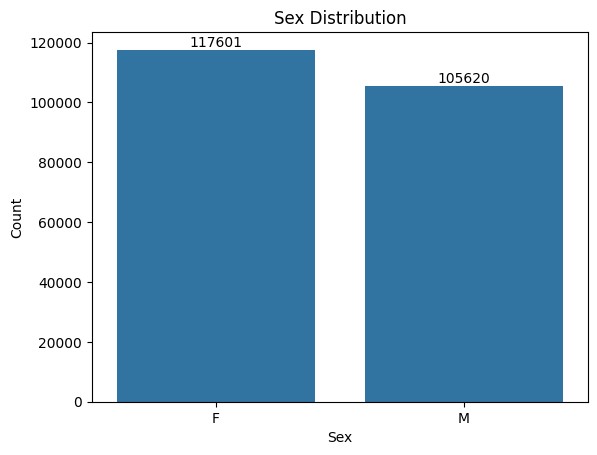

In [325]:
# Plot
ax = sns.countplot(demo, x="gender")
ax.bar_label(ax.containers[0])
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

In [326]:
# Ethnicity/race
demo["race"].value_counts()

race
WHITE                                        134139
BLACK/AFRICAN AMERICAN                        22685
UNKNOWN                                       21250
OTHER                                          7969
WHITE - OTHER EUROPEAN                         4867
ASIAN                                          4058
ASIAN - CHINESE                                3191
HISPANIC/LATINO - PUERTO RICAN                 3090
HISPANIC OR LATINO                             2576
UNABLE TO OBTAIN                               2329
HISPANIC/LATINO - DOMINICAN                    2201
BLACK/CAPE VERDEAN                             2104
WHITE - RUSSIAN                                1688
BLACK/CARIBBEAN ISLAND                         1374
BLACK/AFRICAN                                  1345
PATIENT DECLINED TO ANSWER                      941
ASIAN - SOUTH EAST ASIAN                        760
ASIAN - ASIAN INDIAN                            746
WHITE - BRAZILIAN                               667
HISPANI

In [327]:
list(demo["race"].unique())

['WHITE',
 'OTHER',
 'BLACK/AFRICAN AMERICAN',
 'UNABLE TO OBTAIN',
 'UNKNOWN',
 'WHITE - RUSSIAN',
 'BLACK/CAPE VERDEAN',
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
 'PORTUGUESE',
 'HISPANIC/LATINO - PUERTO RICAN',
 'ASIAN',
 'WHITE - OTHER EUROPEAN',
 'ASIAN - CHINESE',
 'HISPANIC/LATINO - SALVADORAN',
 'HISPANIC/LATINO - GUATEMALAN',
 'WHITE - BRAZILIAN',
 'HISPANIC OR LATINO',
 'ASIAN - KOREAN',
 'BLACK/AFRICAN',
 'BLACK/CARIBBEAN ISLAND',
 'HISPANIC/LATINO - MEXICAN',
 'PATIENT DECLINED TO ANSWER',
 'HISPANIC/LATINO - DOMINICAN',
 'AMERICAN INDIAN/ALASKA NATIVE',
 'ASIAN - SOUTH EAST ASIAN',
 'MULTIPLE RACE/ETHNICITY',
 'WHITE - EASTERN EUROPEAN',
 'HISPANIC/LATINO - HONDURAN',
 'HISPANIC/LATINO - CUBAN',
 'HISPANIC/LATINO - CENTRAL AMERICAN',
 'ASIAN - ASIAN INDIAN',
 'HISPANIC/LATINO - COLUMBIAN',
 'SOUTH AMERICAN']

In [328]:
# Group race/ethnicities
race_groups = {
    "WHITE": "WHITE/EUROPEAN",
    "WHITE - OTHER EUROPEAN": "WHITE/EUROPEAN",
    "WHITE - EASTERN EUROPEAN": "WHITE/EUROPEAN",
    "WHITE - RUSSIAN": "WHITE/EUROPEAN",
    "WHITE - BRAZILIAN": "WHITE/EUROPEAN",
    "PORTUGUESE": "WHITE/EUROPEAN",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/AFRICAN": "BLACK",
    "BLACK/CARIBBEAN ISLAND": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "HISPANIC OR LATINO": "HISPANIC/LATINO",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - CUBAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - SALVADORAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - CENTRAL AMERICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - COLUMBIAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - HONDURAN": "HISPANIC/LATINO",
    "SOUTH AMERICAN": "HISPANIC/LATINO",
    "ASIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - SOUTH EAST ASIAN": "ASIAN",
    "AMERICAN INDIAN/ALASKA NATIVE": "AMERICAN INDIAN/ALASKA NATIVE",
    "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "NATIVE HAWAIIAN/PACIFIC ISLANDER",
    "MULTIPLE RACE/ETHNICITY": "MULTIPLE",
    "OTHER": "OTHER",
    "UNABLE TO OBTAIN": "UNKNOWN",
    "PATIENT DECLINED TO ANSWER": "UNKNOWN",
    "UNKNOWN": "UNKNOWN",
}

demo["race_group"] = demo["race"].map(race_groups)
demo


,gender,race,anchor_age,anchor_year,anchor_year_group,birth_year,race_group
subject_id,,,,,,,
10000032,F,WHITE,52,2180,2014 - 2016,2128,WHITE/EUROPEAN
10000068,F,WHITE,19,2160,2008 - 2010,2141,WHITE/EUROPEAN
10000084,M,WHITE,72,2160,2017 - 2019,2088,WHITE/EUROPEAN
10000108,M,WHITE,25,2163,2014 - 2016,2138,WHITE/EUROPEAN
10000117,F,WHITE,48,2174,2008 - 2010,2126,WHITE/EUROPEAN
...,...,...,...,...,...,...,...
19999733,F,WHITE,19,2152,2011 - 2013,2133,WHITE/EUROPEAN
19999784,M,BLACK/AFRICAN AMERICAN,57,2119,2017 - 2019,2062,BLACK
19999828,F,WHITE,46,2147,2017 - 2019,2101,WHITE/EUROPEAN


In [329]:
palette_dict = {
    'WHITE/EUROPEAN': '#db5f57',
    'BLACK': '#dbb757',
    'HISPANIC/LATINO': '#a7db57',
    'ASIAN': '#57db5f',
    'AMERICAN INDIAN/ALASKA NATIVE': '#57dbb7',
    'NATIVE HAWAIIAN/PACIFIC ISLANDER': '#57a7db',
    'MULTIPLE': '#5f57db',
    'OTHER': '#b757db',
    'UNKNOWN': '#db57a7',
    }

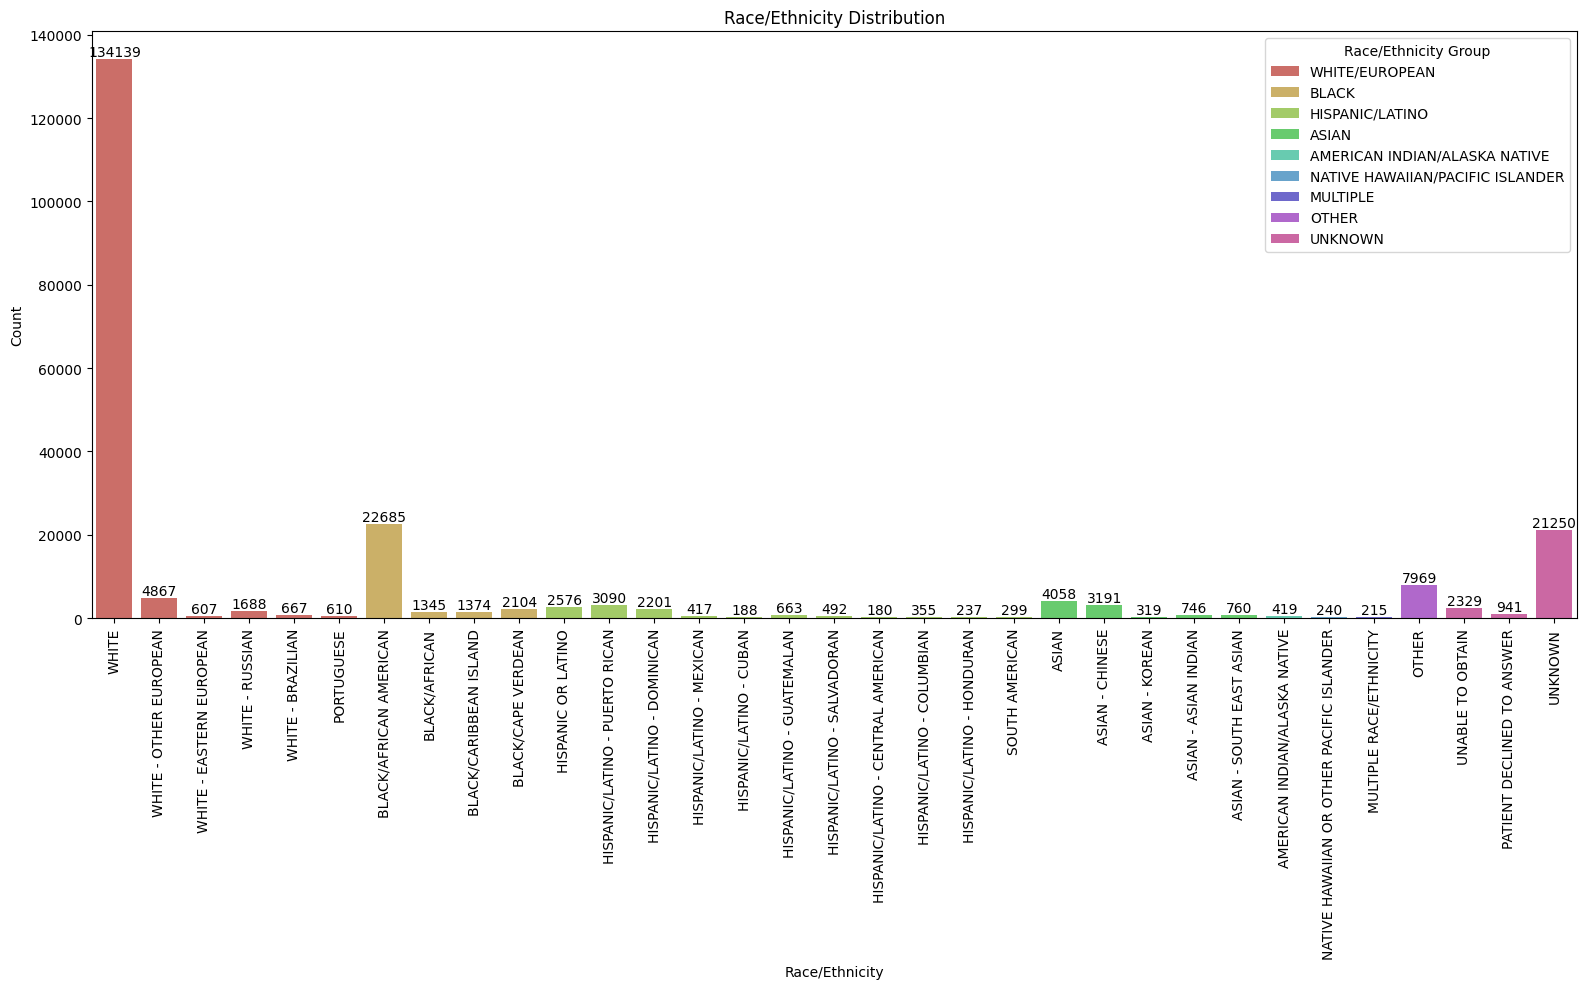

In [330]:
# Plot
plt.figure(figsize=(16, 10))

# # Order by count
# order = demo['race'].value_counts().index
# hue_order = demo['race_group'].value_counts().index.tolist()
# group_idx = range(9)

# Order by group
order = race_groups.keys()
hue_order = race_groups.values()
group_idx = (0, 6, 10, 21, 26, 27, 28, 29, 30)

ax = sns.countplot(demo, x="race", hue="race_group", order=order, hue_order=hue_order, palette=palette_dict)

# Set bar labels
for c in [ax.containers[i] for i in group_idx]:
    ax.bar_label(c)

plt.title("Race/Ethnicity Distribution")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Race/Ethnicity Group')
plt.xticks(rotation=90)
plt.tight_layout()

33


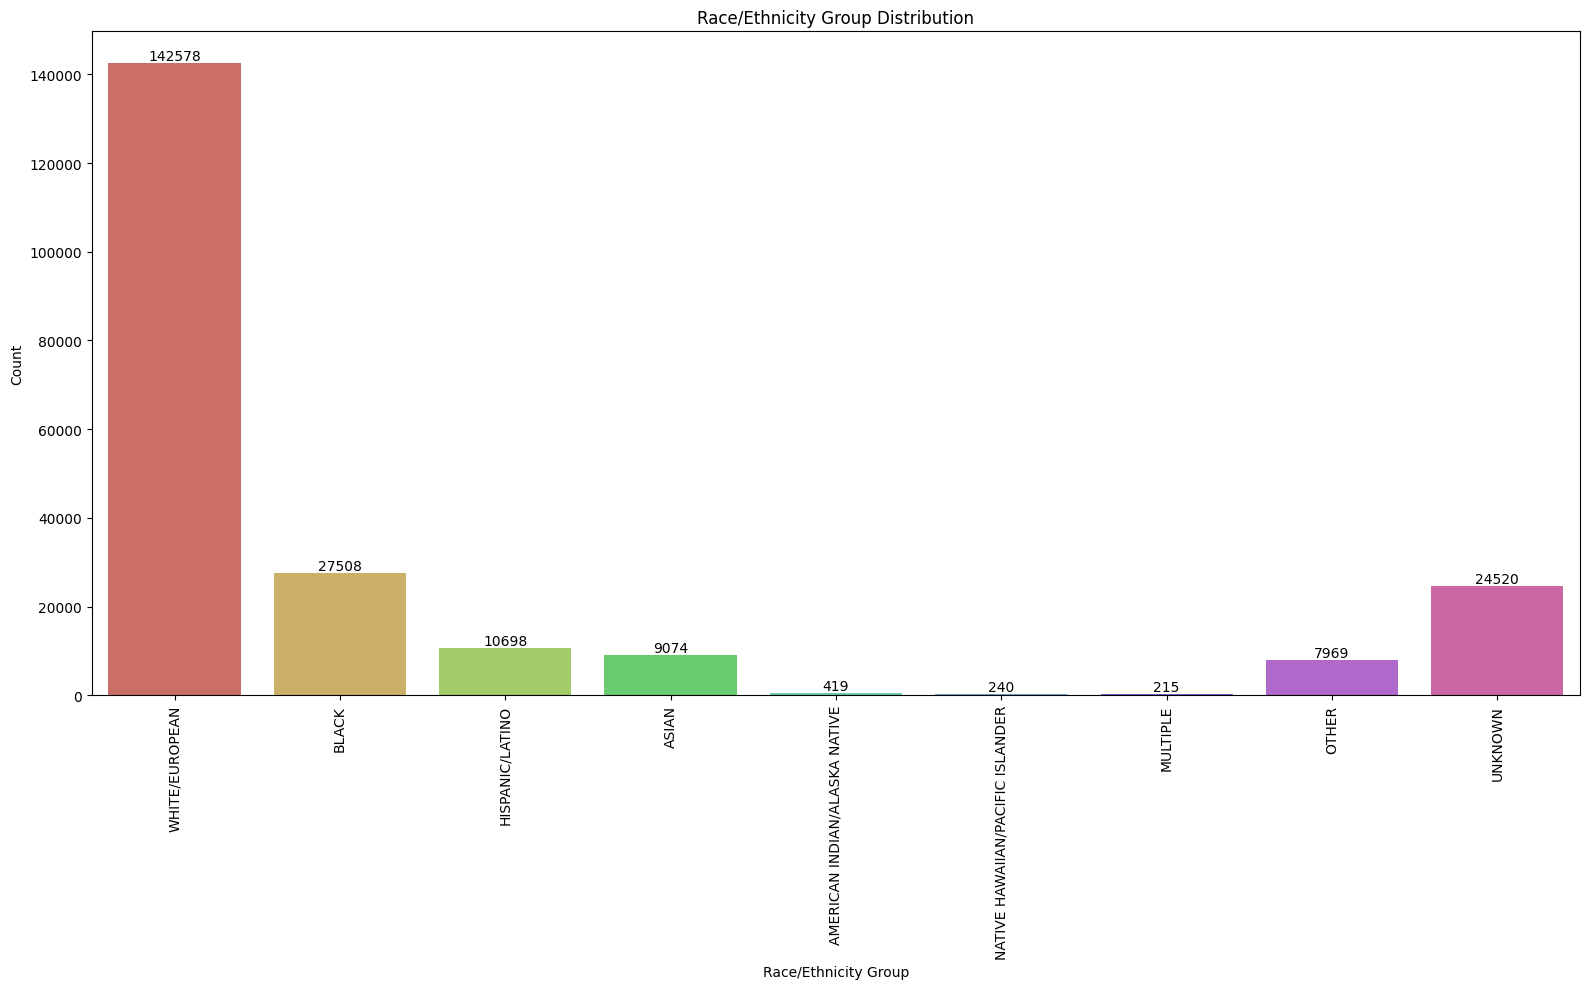

In [331]:
# Plot groups
plt.figure(figsize=(16, 10))

## Order by count
# hue_order = demo['race_group'].value_counts().index.tolist()
# group_idx = range(9)

## Order by group
hue_order = race_groups.values()
group_idx = (0, 6, 10, 21, 26, 27, 28, 29, 30)

ax = sns.countplot(demo, x="race_group", hue="race_group", order=hue_order, hue_order=hue_order, palette=palette_dict)

# Set bar labels
print(len(ax.containers))
for c in [ax.containers[i] for i in group_idx]:
    ax.bar_label(c)

plt.title("Race/Ethnicity Group Distribution")
plt.xlabel('Race/Ethnicity Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# Language
demo["language"].value_counts()

language
English                   197797
Spanish                     6663
Chinese                     3299
Russian                     2365
Kabuverdianu                1727
Portuguese                  1412
Haitian                      979
Other                        600
Vietnamese                   474
Arabic                       294
Italian                      293
Modern Greek (1453-)         269
Persian                      165
Korean                       158
American Sign Language       148
Thai                         124
Polish                       120
Amharic                      100
Khmer                         94
Hindi                         92
Japanese                      89
French                        80
Bengali                       67
Armenian                      42
Somali                        36
Name: count, dtype: int64

In [64]:
# Birth year/age
def calc_birth_year_group(row):
    start, end = row["anchor_year_group"].split("-")
    return f"{int(start) - row["anchor_age"]}-{int(end) - row["anchor_age"]}"

demo["birth_year_group"] = demo.apply(calc_birth_year_group, axis=1)
demo["birth_year_group"]

subject_id
10000032    1962-1964
10000068    1989-1991
10000084    1945-1947
10000108    1989-1991
10000117    1960-1962
              ...    
19999733    1992-1994
19999784    1960-1962
19999828    1971-1973
19999840    1950-1952
19999987    1954-1956
Name: birth_year_group, Length: 218011, dtype: object

Text(0, 0.5, 'Number of Patients')

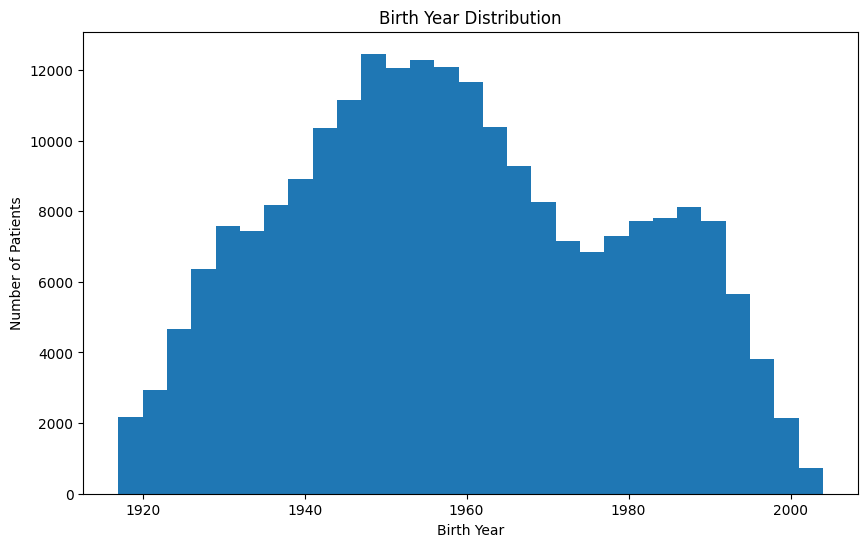

In [333]:
# Plot birth year groups
demo["birth_year_start"] = demo["birth_year_group"].apply(lambda x: int(x.split('-')[0]))
demo["birth_year_end"] = demo["birth_year_group"].apply(lambda x: int(x.split('-')[1]))
demo["birth_year_midpoint"] = (demo["birth_year_start"] + demo["birth_year_end"]) / 2

plt.figure(figsize=(10, 6))
plt.hist(demo["birth_year_midpoint"], bins=np.arange(demo["birth_year_start"].min(), demo["birth_year_end"].max() + 1, 3))
plt.title('Birth Year Distribution')
plt.xlabel('Birth Year')
plt.ylabel('Number of Patients')

# Aggregate data, convert to dictionary

In [ ]:
# Group by subject_id (18m 40.1s)
grouped_by_subject = _sorted.groupby('subject_id').apply(lambda x: {
    'demographics': list(x[['anchor_year', 'anchor_year_group', 'anchor_age', 'birth_year', 'gender', 'race', 'language', 'marital_status', 'insurance']].iloc[0]),
    'marital_status': list(dict(x.groupby('hadm_id')['marital_status'].first()).items()),
    'insurance': list(dict(x.groupby('hadm_id')['insurance'].first()).items()),
    'icd': dict(x.groupby(['hadm_id', 'admit_age']).apply(lambda row: list(zip(row['icd_code'], row['icd_version'])))),
    'admission_lengths': list((x.groupby('hadm_id')['length_of_stay'].first().dt.total_seconds() / (24 * 3600))), # get length of stay in days for each admission
}).reset_index(name='person_data')


In [116]:
# Format
# {
#     'subject_id' : {
#         'demographics': [
#             anchor_year, # randomly assigned year to help de-identify real birth year
#             anchor_year_group, # anchor_year corresponds to a real year within this range
#             anchor_age, # age in anchor_year
#             birth_year, # calculated de-identified birth year
#             sex,
#             race/ethnicity,
#             language,
#         ],
#         'marital_status': [('single', adm1_id), ('married', adm2_id), ...],
#         'insurance': [('single', adm1), ('married', adm2), ...],
#         'icd': {(adm1_id, age_at_adm1): [(icd_code, icd_version), (icd_code, icd_version), ...],
#                 (adm2_id, age_at_adm2): [(icd_code, icd_version), (icd_code, icd_version),...],
#                 ...},
#         'admission_lengths': [
#                 length_of_stay_adm1, # length in days
#                 length_of_stay_adm2,
#             ...]
#         },
#     ...
# }

grouped_by_subject.iloc[0]["person_data"]

{'demographics': [2180,
  '2014 - 2016',
  52,
  2128,
  'F',
  'WHITE',
  'English',
  'WIDOWED',
  'Medicaid'],
 'marital_status': [(22595853, 'WIDOWED'),
  (22841357, 'WIDOWED'),
  (25742920, 'WIDOWED'),
  (29079034, 'WIDOWED')],
 'insurance': [(22595853, 'Medicaid'),
  (22841357, 'Medicaid'),
  (25742920, 'Medicaid'),
  (29079034, 'Medicaid')],
 'icd': {(22595853, 52): [('5723', 9),
   ('78959', 9),
   ('5715', 9),
   ('07070', 9),
   ('496', 9),
   ('29680', 9),
   ('30981', 9),
   ('V1582', 9)],
  (22841357, 52): [('07071', 9),
   ('78959', 9),
   ('2875', 9),
   ('2761', 9),
   ('496', 9),
   ('5715', 9),
   ('V08', 9),
   ('3051', 9)],
  (25742920, 52): [('07054', 9),
   ('78959', 9),
   ('V462', 9),
   ('5715', 9),
   ('2767', 9),
   ('2761', 9),
   ('496', 9),
   ('V08', 9),
   ('3051', 9),
   ('78791', 9)],
  (29079034, 52): [('45829', 9),
   ('07044', 9),
   ('7994', 9),
   ('2761', 9),
   ('78959', 9),
   ('2767', 9),
   ('3051', 9),
   ('V08', 9),
   ('V4986', 9),
   ('V4

In [122]:
# Group by subject_id and admission
grouped_by_adm = _sorted.groupby(['subject_id', 'hadm_id']).apply(lambda x: {
    'condition': list(zip(x['icd_code'], x['icd_version'])),
    'age': x['admit_age'].iloc[0],
    'LOS': x['length_of_stay'].iloc[0].total_seconds() / (24 * 3600),
})

C:\Users\sys2131\AppData\Local\Temp\ipykernel_18932\3762584611.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_by_adm = _sorted.groupby(['subject_id', 'hadm_id']).apply(lambda x: {


In [125]:
# Format
# {
#     (subject_id1, hadm_id1): {
#         condition: [(icd_code, icd_version), (icd_code, icd_version), ...], age: age_at_adm1, LOS: length_of_stay_adm1
#         },
#     (subject_id1, hadm_id2): {
#         condition: [(icd_code, icd_version), (icd_code, icd_version), ...], age: age_at_adm2, LOS: length_of_stay_adm2
#         }, 
#     (subject_id2, hadm_id1):  {
#         condition: [(icd_code, icd_version), (icd_code, icd_version), ...], age: age_at_adm1, LOS: length_of_stay_adm2
#         },
#         ...
# }
print(grouped_by_adm.iloc[0])
grouped_by_adm.head()

{'condition': [('5723', 9), ('78959', 9), ('5715', 9), ('07070', 9), ('496', 9), ('29680', 9), ('30981', 9), ('V1582', 9)], 'age': 52, 'LOS': 0.7861111111111111}


subject_id  hadm_id 
10000032    22595853    {'condition': [('5723', 9), ('78959', 9), ('57...
            22841357    {'condition': [('07071', 9), ('78959', 9), ('2...
            25742920    {'condition': [('07054', 9), ('78959', 9), ('V...
            29079034    {'condition': [('45829', 9), ('07044', 9), ('7...
10000068    25022803    {'condition': [('30500', 9)], 'age': 19, 'LOS'...
dtype: object

In [126]:
# Convert to dictionary
by_subject_dict = dict(grouped_by_subject.set_index('subject_id')['person_data'])
by_adm_dict = grouped_by_adm.to_dict()

In [127]:
# Save dictionary to file
import pickle 

with open('diag_adm_by_subject.pkl', 'wb') as f:
    pickle.dump(by_subject_dict, f)
with open('diag_adm_by_adm.pkl', 'wb') as f:
    pickle.dump(by_adm_dict, f)
        
# with open('diagnoses_admissions_data.pkl', 'rb') as f:
#     diagnoses_admissions_data = pickle.load(f)